In [3]:
import pickle
import numpy as np
from typing import Dict
import os
import xarray as xr
%load_ext autoreload
%autoreload 2
from basic_functions import *
import itertools
import datetime as dt
import plotly.graph_objects as go
import echopype as echoviz


In [31]:
# def plot_3D_echogram(src_path:str="../data/acoustic_data/18kHz/processed_data/18kHz_v1_summer.pkl") :
#     ni = 0
#     with open(src_path, 'rb') as pkl_file:
#         # read data in pkl as stream
#         while True:
#             try:
#                 if ni>0 :
#                     break
#                 ni+=1
#                 print("hey")
#                 data_title, data_dict = pickle.load(pkl_file)
#                 print(data_dict.keys())
#                 depth=data_dict["DEPTH"][::5].astype(np.float32)
#                 longitude = data_dict["LONGITUDE"][::60].astype(np.float32)
#                 latitude = data_dict["LATITUDE"][::60].astype(np.float32)
#                 chan = data_dict["CHANNEL"]
#                 n = latitude.shape[0]
#                 d=depth.shape[0]
            
#                 if len(chan)>1 :
#                     sv = data_dict["Sv"][::60, ::5, 0]
#                 else : 
#                     sv = data_dict["Sv"][::60, ::5]

#                  # Construction des points 3D
#                 lon_flat = np.repeat(longitude, d)  # (n*d,)
#                 lat_flat = np.repeat(latitude, d)  # (n*d,)
#                 depth_flat = np.tile(depth, n)  # (n*d,)
#                 Sv_flat = sv.ravel()  # (n*d,)

#                 print(f"Shapes aplatis -> lon_flat: {lon_flat.shape}, lat_flat: {lat_flat.shape}, depth_flat: {depth_flat.shape}, Sv_flat: {Sv_flat.shape}")

#                 # Création du scatter 3D
#                 fig = go.Figure(
#                     data=[go.Scatter3d(
#                         x=lon_flat,
#                         y=lat_flat,
#                         z=depth_flat,
#                         mode='markers',
#                         marker=dict(
#                             size=2,
#                             color=Sv_flat,
#                             colorscale='Viridis',
#                             colorbar=dict(title="Sv (dB)"),
#                             opacity=0.8
#                         )
#                     )]
#                 )

#                 # Mise en page
#                 fig.update_layout(
#                     title="Échogramme 3D",
#                     scene=dict(
#                         xaxis_title="Longitude",
#                         yaxis_title="Latitude",
#                         zaxis_title="Profondeur (m)",
#                         zaxis=dict(autorange="reversed")  # Inverser l'axe Z (profondeur)
#                     )
#                 )

#                 fig.show()
                
#             except EOFError:
#                 print("End of file.")
#                 break

In [32]:
# plot_3D_echogram()

In [ ]:
with open(cropped_path, 'rb') as pkl_file : 
    while True : 
        try :
            date, data_dict = pickle.load(pkl_file)
            keys = list(data_dict.keys())
            print(date)
            
        except EOFError:
                print("End of file.")
                break
                
        

2016-05-19
2016-05-20
2016-05-21
2016-05-22
2016-05-23
2016-05-24
2016-05-25
2016-05-26
2016-05-27
2017-03-18
2017-03-19
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-30
2017-05-31
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2020-03-14
2020-03-15
2020-03-16
2020-03-17
2020-03-18
2020-03-19
2020-03-20
2020-03-21
2020-03-22
2017-03-01
2017-03-02
2017-03-03
2017-03-04
2017-04-11
2017-04-12
2017-04-13
2017-04-14
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2019-05-14
2019-05-15
2019-05-16
2019-05-01
2019-05-02
2019-05-03
2019-05-04
2019-05-05
2019-05-06
2019-05-07
2019-05-17
2019-05-18
2019-05-19
2019-05-20
2019-05-21
2019-05-22
2019-05-23
2019-05-24
2019-05-25
2019-05-26
2019-05-27
2019-05-28
2019-05-29
2019-05-30
2019-05-31
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-21
2021-03-22
2021-03-23
2021-03-24

In [4]:
cropped_path = "../data/acoustic_data/18kHz/processed_data/by_day/18kHz_v1_winter_cropped_24h.pkl"
# sample_rate, mean, std = get_sample_rate_cropped_files(cropped_path)
# print(sample_rate)




In [38]:
def plot_echogramps_from_pkl_18kHz(pkl_path:str, save:bool=False) : 
    with open(pkl_path, 'rb') as pkl_file:
        # read data in pkl as stream
        while True:
            try:
                date, data_dict = pickle.load(pkl_file) 
                print(date)
                # Get times values
                Sv = data_dict["Sv"]
                # Sv = Sv[:, :, 0]
                print(Sv.shape)
                time = data_dict["TIME"]
                time_str = np.array([dt.strftime("%H:%M:%S") for dt in time])
                depth = data_dict["DEPTH"]
                
                tick_indices = np.linspace(0, len(time) - 1, num=10, dtype=int)
                tick_labels = time_str[tick_indices]

                time_indices = np.array([i.strftime("%H:%M:%S") for i in time[tick_indices]])
                
                # Plot
                plt.pcolormesh(time_str, -depth, 10 * np.log10(Sv.T), shading='auto', cmap='jet')

                # Labels and title
                plt.colorbar(label="Sv (dB re 1m⁻¹)")
                plt.xlabel("Time")
                plt.xticks(time_indices, tick_labels, rotation=90)
                plt.ylabel("Depth (m)")
                plt.title(f"Echogram of acoustic data recorded the {date} for 18 kHz channel")
    
                plt.show()

                if save : 
                    parent_folder = os.path.dirname(pkl_path)
                    print(pkl_path)
                    # plt.savefig(parent_folder + f"/figures/echogram_{min_time}_to_{max_time}_at_{channel_str}.png", dpi=300, bbox_inches="tight")

            except EOFError :
                print("End of file")
                break


2016-05-19
(2025, 240)


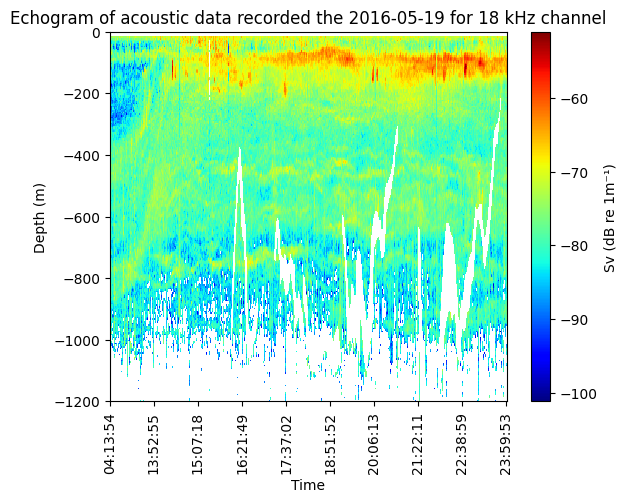

2016-05-20
(4259, 240)


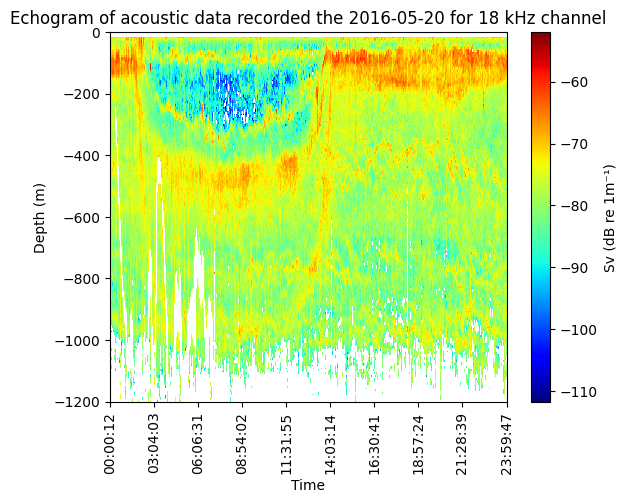

2016-05-21
(4890, 240)


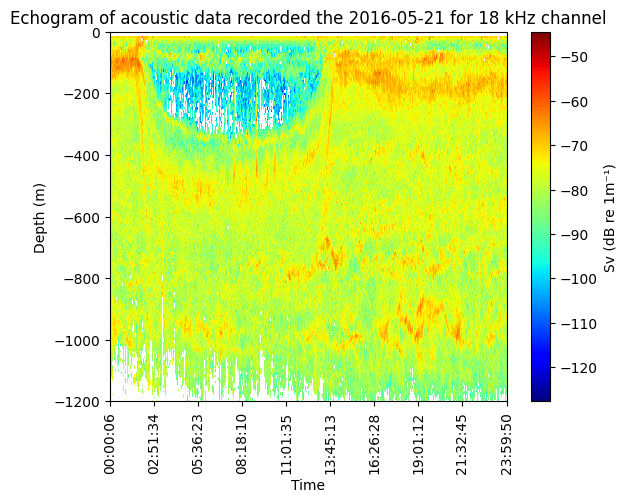

2016-05-22
(4737, 240)


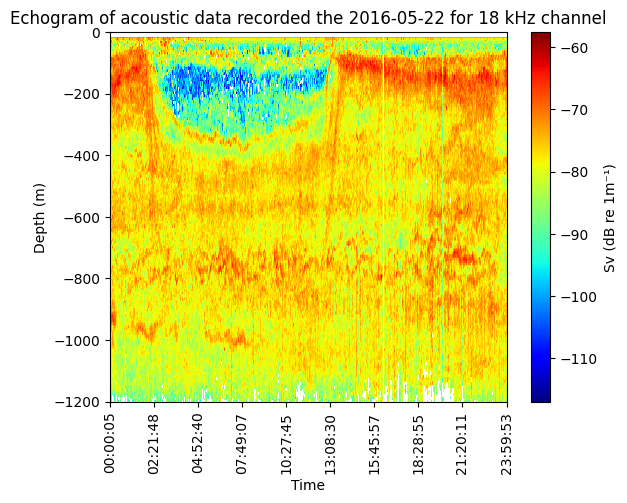

2016-05-23
(4836, 240)


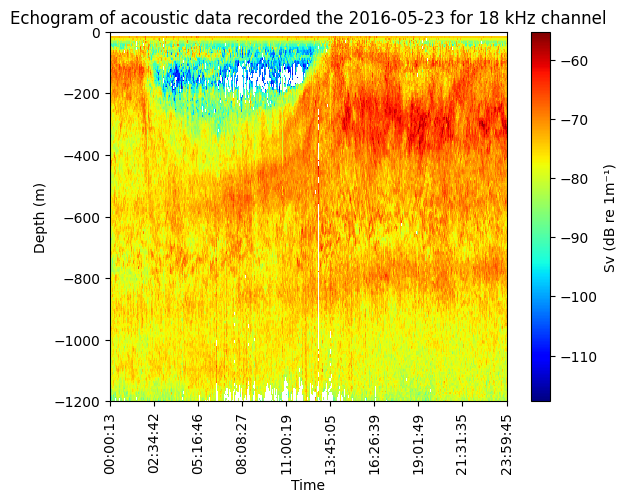

2016-05-24
(5207, 240)


KeyboardInterrupt: 

In [39]:
cropped_path = "../data/acoustic_data/18kHz/processed_data/by_day/18kHz_v1_fall_cropped_24h.pkl"
plot_echogramps_from_pkl_18kHz(cropped_path)